In [1]:
# Import Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the titles
titles = pd.read_csv("Fault_Column_Names.txt", header = None)

# Load the data and add the titles to the columns
df = pd.read_csv('Fault_Variables_dataset.csv', sep="\t", names=titles[0])
df

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,...,-0.4286,0.0026,0.7254,0,0,0,0,0,0,1
1937,144,175,340581,340598,287,44,24,34599,112,133,...,-0.4516,-0.0582,0.8173,0,0,0,0,0,0,1
1938,145,174,386779,386794,292,40,22,37572,120,140,...,-0.4828,0.0052,0.7079,0,0,0,0,0,0,1
1939,137,170,422497,422528,419,97,47,52715,117,140,...,-0.0606,-0.0171,0.9919,0,0,0,0,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

There are no null values, the last 7 columns are the types of faults while the first 27 are specifications of the instances

In [4]:
# Add a column to calculate the sum of the binary variables of faults.
# That will be used to see if multiple faults can occur in an instance of the dataset.
df['Sum_of_Faults'] = df.iloc[:,-7:].sum(axis=1)
df.head()


,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,Sum_of_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,-0.2913,0.5822,1,0,0,0,0,0,0,1
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,-0.1756,0.2984,1,0,0,0,0,0,0,1
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,-0.1228,0.2150,1,0,0,0,0,0,0,1
3,853,860,369370,369415,176,13,45,18996,99,126,...,-0.1568,0.5212,1,0,0,0,0,0,0,1
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,-0.1992,1.0000,1,0,0,0,0,0,0,1


In [5]:
df["Sum_of_Faults"].value_counts()

1    1941
Name: Sum_of_Faults, dtype: int64

In [6]:
# The new column only has no other values than 1. So no instance has multiple faults.
# All of the plates are assigned only 1 fault as they should. We can drop the column now.
df = df.drop(["Sum_of_Faults"], axis=1)

In [7]:
# Showing the scales and getting an idea about the skewness of the attributes
# We will also make a boxplot to visualize the scaling difference
df.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,...,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,...,0.083288,-0.131305,0.585420,0.081401,0.097888,0.201443,0.037094,0.028336,0.207110,0.346728
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,...,0.500868,0.148767,0.339452,0.273521,0.297239,0.401181,0.189042,0.165973,0.405339,0.476051
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,...,-0.991000,-0.998900,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,...,-0.333300,-0.195000,0.248200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,...,0.095200,-0.133000,0.506300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,...,0.511600,-0.066600,0.999800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,...,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# Get the column name of the maximum value in the last 7 columns for each row.
# This would give the name of the corresponding fault for this row.
labels=(df.iloc[:,-7:]).idxmax(axis=1)

# Take the list of the faults names
faults_list=df.columns.values[-7:]

# Drop the one hot encoded columns by using the list of the faults names.
df=df.drop(faults_list,axis=1)

# Add the series of the labels as a new column
df['Labels']=labels

# Check how our dataframe looks now
df.head()


,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Labels
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry


<AxesSubplot: xlabel='Labels', ylabel='count'>

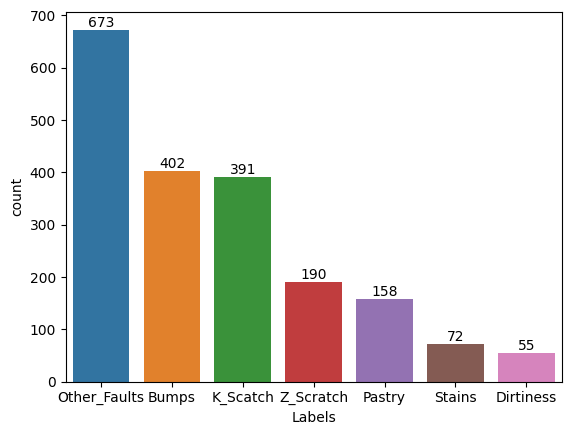

In [9]:
# Plot the value counts of each variable
ax = sns.countplot(df, x='Labels', order = df['Labels'].value_counts().index)
ax.bar_label(ax.containers[0])
ax

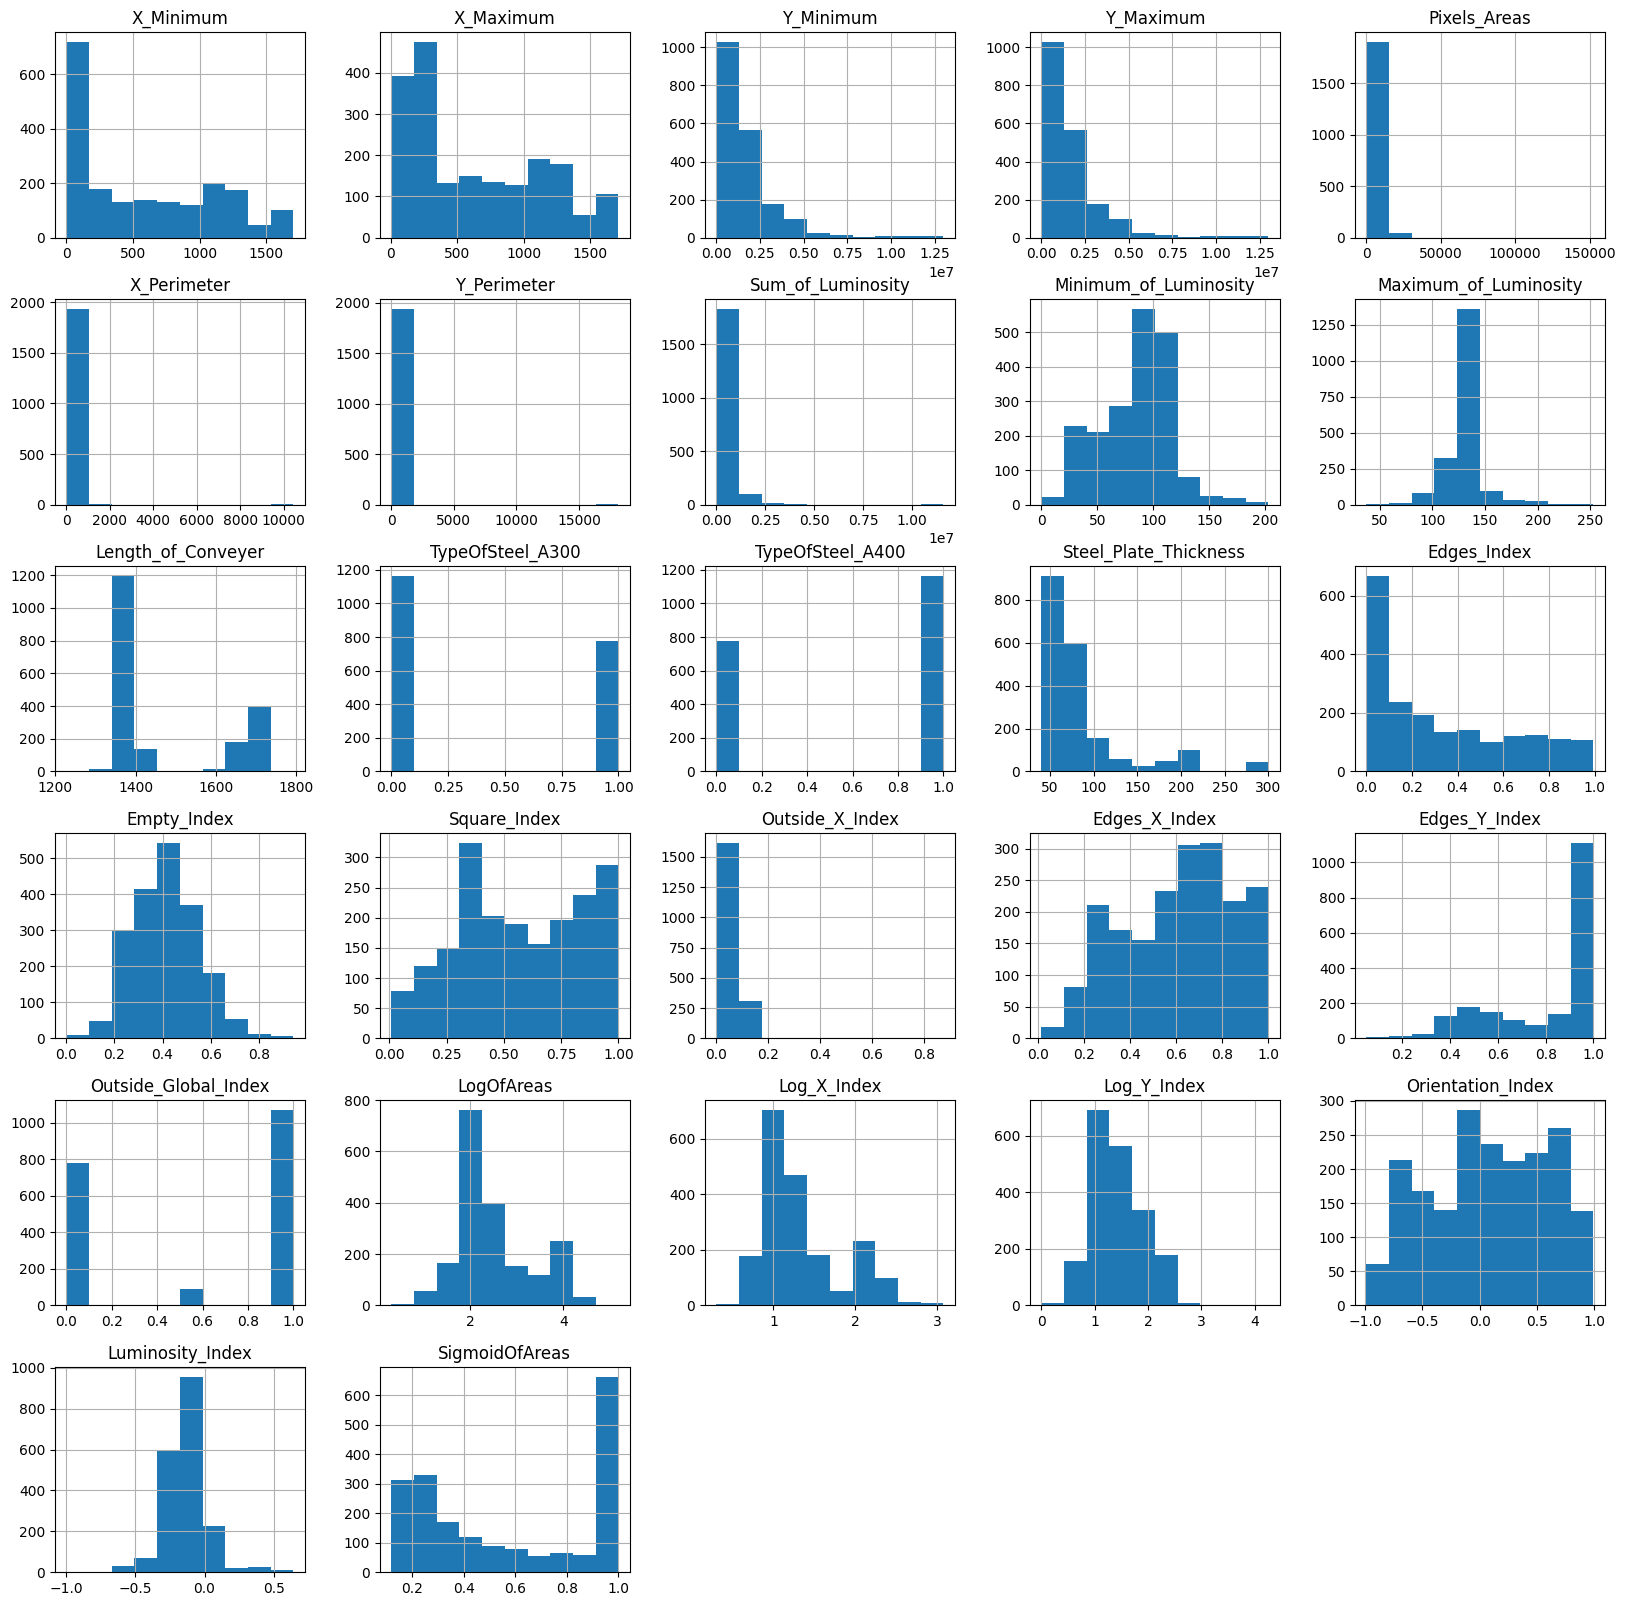

In [10]:
# Create a hiistogram to see the distribution of each feature.
df.hist(figsize = ([20,20]));

<AxesSubplot: >

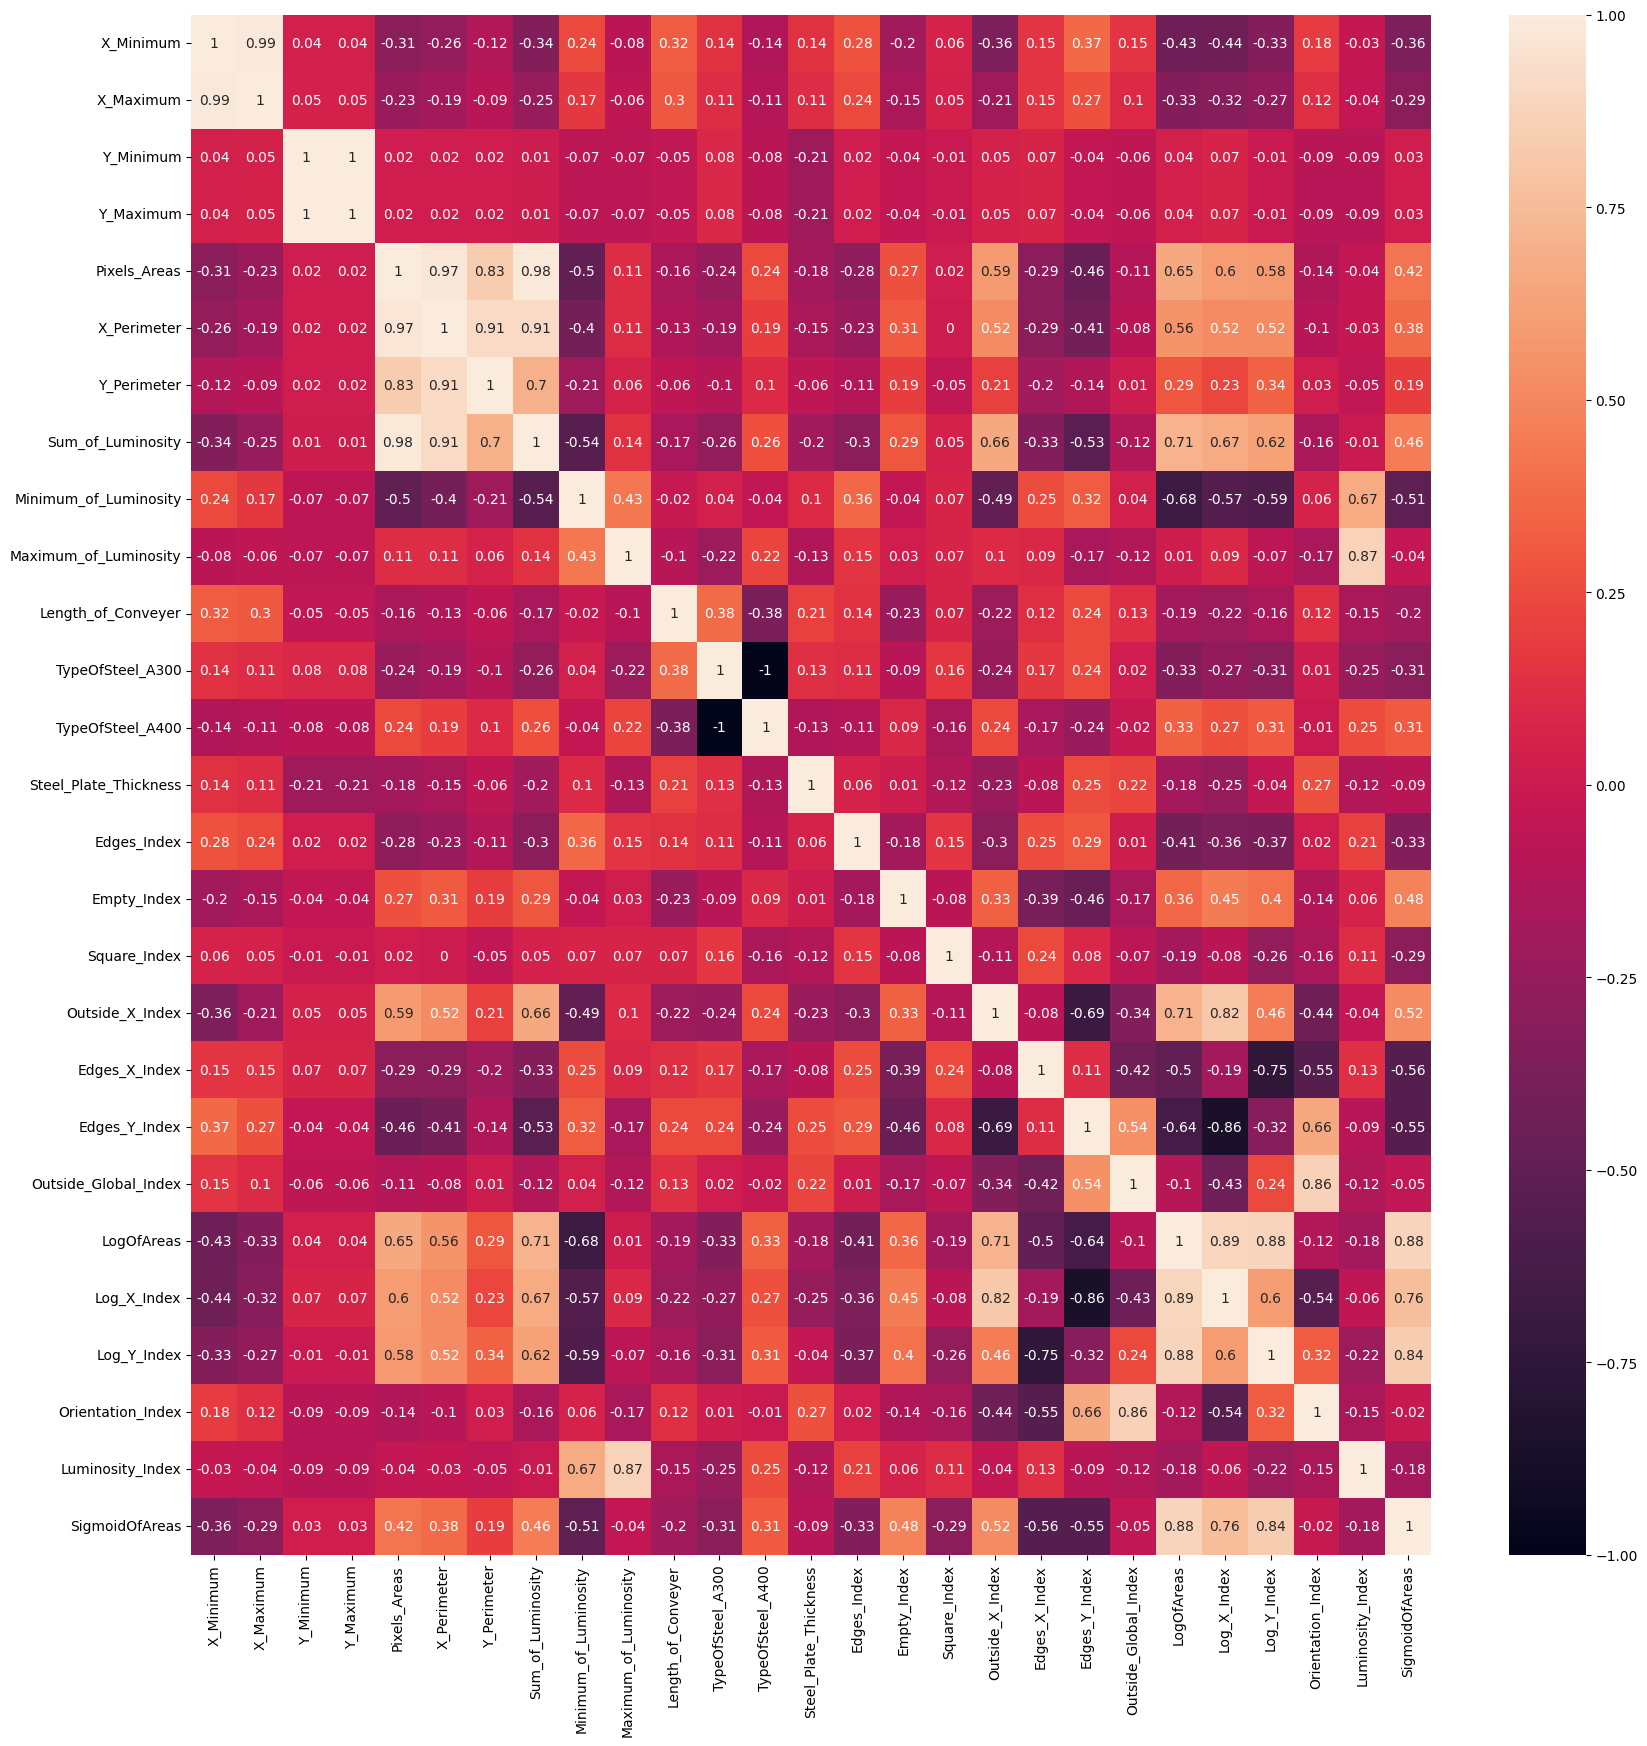

In [11]:
# Check the correlations between different attributes.
corr = df.corr()
corr = corr.round(2)
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)

Some of the features seem strongly correlated. So, applying a dimensionality reduction technique could be considered.

<AxesSubplot: xlabel='LogOfAreas', ylabel='SigmoidOfAreas'>

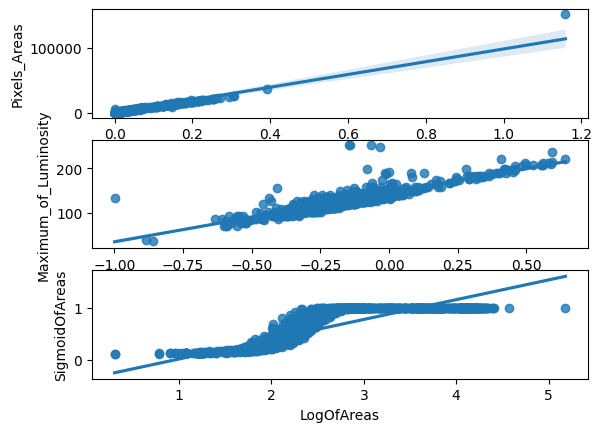

In [12]:
# Plot some examples to the correlated variables.
fig, axs = plt.subplots(nrows=3)
sns.regplot(x = df['Sum_of_Luminosity'],y = df['Pixels_Areas'], ax=axs[0])
sns.regplot(x = df['Luminosity_Index'],y = df['Maximum_of_Luminosity'], ax=axs[1])
sns.regplot(x = df['LogOfAreas'],y = df['SigmoidOfAreas'], ax=axs[2])

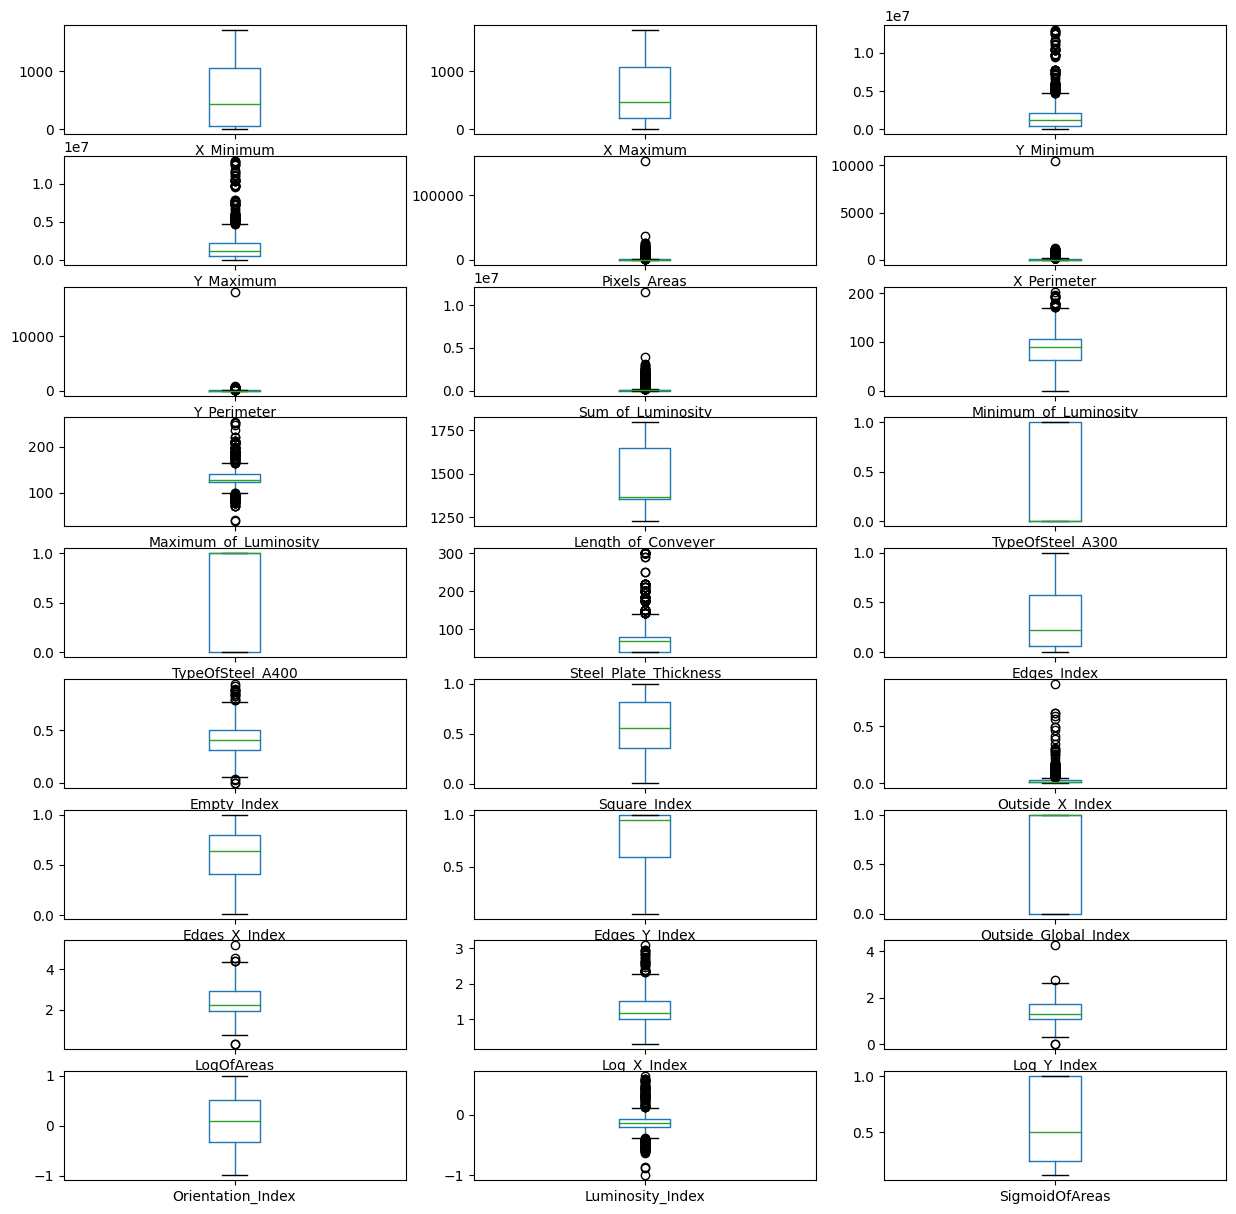

In [13]:
# Create boxplots
df.plot(kind='box', layout=(9,3), subplots=True,sharex=False, sharey=False, figsize=(15,15))
plt.show()

Because different attributes have very different scales, using a scaler might be a good idea before starting to work with the dataset.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7d583fb5-f0c9-4f5f-bb6c-438ad8bfb31a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>